# Exploratory Data Analysis for Text Data
- Reference: https://medium.com/bigpanda-engineering/exploratory-data-analysis-for-text-data-29cf7dd54eb8

In [1]:
import os
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
!pwd
os.chdir('gdrive/My Drive/Colab Notebooks/')
!pwd
!ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content
/content/gdrive/My Drive/Colab Notebooks
 abcnews-date-text.csv
 ab_data.csv
'A B Test.ipynb'
'A method to categorical variable in flight delay datasets.ipynb'
'ARIMA Forecasting.ipynb'
 assignment0.ipynb
'assignment2_(release).ipynb'
 assignment2_sol.ipynb
'Building a Simple Chatbot.ipynb'
 chatbot.txt
'Concrete Compressive Strength Prediction.ipynb'
'Copy of Lecture_6_in_class.ipynb'
 corpus
'COVID-19 Data by ZIP Code.csv'
 dask.ipynb
 datasets
'Da

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
data = pd.read_csv('Donald-Tweets!.csv')

## Basic statistics on the text

count    7375.000000
mean       16.980746
std         6.330227
min         1.000000
25%        12.000000
50%        18.000000
75%        22.000000
max        31.000000
Name: Tweet_Text, dtype: float64


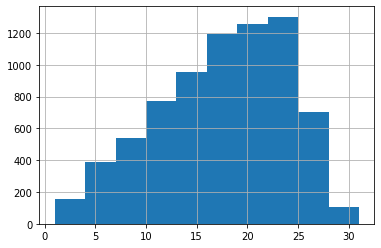

In [4]:
lens = data.Tweet_Text.str.split().apply(lambda x: len(x))
print(lens.describe())
lens.hist()

Text length is short because average length is 17 words.

## Term frequencies

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stops =  set(stopwords.words('english')+['com'])
co = CountVectorizer(stop_words=stops)
counts = co.fit_transform(data.Tweet_Text)
pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(50)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,0
co,3074
https,2710
realdonaldtrump,1544
trump,1238
great,1049
thank,893
amp,627
trump2016,618
hillary,543
makeamericagreatagain,518


Let's check the bi-grams as well.

In [6]:
co = CountVectorizer(ngram_range=(2,2),stop_words=stops)
counts = co.fit_transform(data.Tweet_Text)
pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(50)

,0
https co,2670
http co,396
trump2016 https,275
donald trump,244
make america,243
america great,214
crooked hillary,194
hillary clinton,191
makeamericagreatagain trump2016,160
makeamericagreatagain https,128


## More Sophisticated Text Characteristics

In [7]:
from tqdm import tqdm
words = pd.read_table('https://raw.githubusercontent.com/dwyl/english-words/master/words.txt')
words.columns=['word']
words = words['word'].str.lower().values.tolist()
data['clean_text'] = data.Tweet_Text.apply(lambda x: ' '.join([i for i in x.split(' ') if not (i.startswith('@') or i.startswith('#'))]))
data['clean_text'] = data.clean_text.str.lower().str.replace('[^a-zA]', ' ')
non_list = {}
for sent in tqdm(data.clean_text.str.split().values):
    for token in sent:
        if token not in words:
            non_list[token] = 1 if token not in non_list else non_list[token]+1
            
pd.Series(non_list).sort_values(ascending=False).head(30)

100%|██████████| 7375/7375 [07:20<00:00, 16.74it/s]


https                    2441
http                      446
makeamericagreatagain     116
donaldtrump                76
realdonaldtrump            75
kasich                     63
false                      39
lyin                       39
mccain                     35
clintons                   33
pme                        33
hillaryclinton             32
obamacare                  32
dems                       27
hillarys                   26
emails                     26
megyn                      22
foxnews                    19
turnberry                  17
rnc                        17
snl                        16
putin                      16
nafta                      16
obamas                     16
tpp                        16
jebbush                    16
americafirst               15
fiorina                    15
facebook                   12
wikileaks                  11
dtype: int64

## Feature engineering

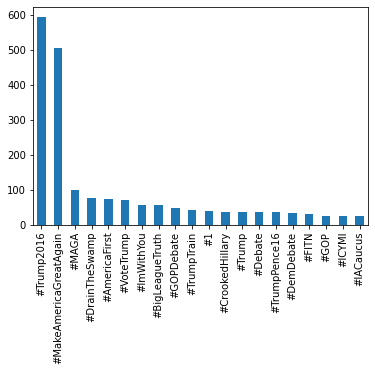

In [8]:
data.Tweet_Text.str.extractall(r'(\#\w+)')[0].value_counts().head(20).plot.bar()

## Using machine learning models

### Topic modeling

In [9]:
from sklearn.decomposition import LatentDirichletAllocation, NMF

vectorizer = CountVectorizer(stop_words=stops)
model = vectorizer.fit(data.clean_text)
docs = vectorizer.transform(data.clean_text)
lda = LatentDirichletAllocation(20)
lda.fit(docs)
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([(feature_names[i])
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()
    
print_top_words(lda,vectorizer.get_feature_names(),10)

Topic #0: co trump https vote great thank amp donald people http
Topic #1: cruz ted trump amp lyin many doesnt chris us go
Topic #2: co https marco rubio senator lightweight warren goofy elizabeth trump
Topic #3: hillary clinton crooked said bad president bernie obama jeb sanders
Topic #4: co better rt repeal country replace https much great trump
Topic #5: america make great trump back vote donald jobs going want
Topic #6: far people states united president really rt bad win http
Topic #7: co https amp trump rt tonight pme vote one tune
Topic #8: trump get people co dont president country want mr https
Topic #9: amp immigration trump illegal cant rubio jeb weak vets rt
Topic #10: trump poll polls http debate new gop carson co donald
Topic #11: co http forward trump looking look watching biased clinton rt
Topic #12: co https poll great thank honor numbers new iowa soon
Topic #13: co https rt trump thank http donald speech vegas las
Topic #14: nothing people new spent party amp millions

Topic #0 about competitors, Topic #9 about rallies and Topic #2 about the campaign phrases

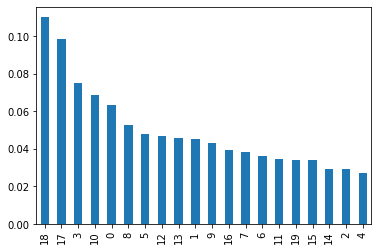

In [10]:
data['topic']=lda.transform(docs).argmax(axis=1)
data.topic.value_counts(normalize=True).plot.bar()

In [11]:
data[data.topic==0].Tweet_Text.sample(5).values

array(['"@d_seaman: @realDonaldTrump @DRUDGE_REPORT DOMINATING. TRUMP!!!!',
       '#VoteTrumpMI! #Trump2016\nhttps://t.co/IWMxISjH6L',
       'After @TrumpScotland, I will visit @TrumpDoonbeg in Ireland, the magnificent resort fronting on the Atlantic Ocean.',
       '"@TruthisAll1: @realDonaldTrump @DLake66675 @ChateauEmissary @trumpettes16 "He keeps rising and shining...Trump 2016!" Thank you!',
       'When people find out how bad a job Scott Walker has done in WI, they won۪t be voting for him. Massive deficit, bad jobs forecast, a mess.'],
      dtype=object)

### Time series analysis

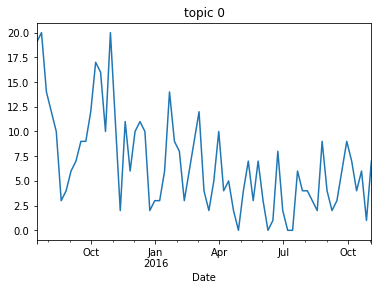

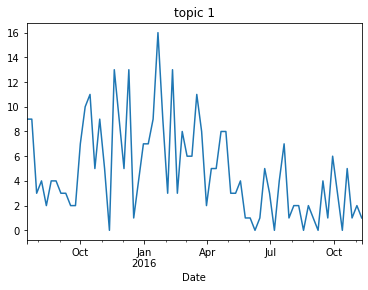

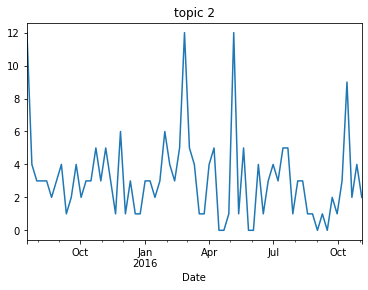

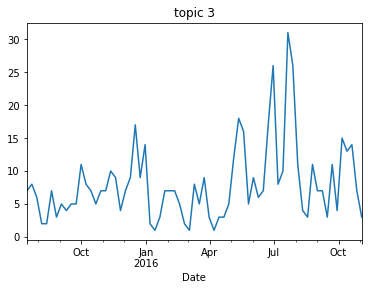

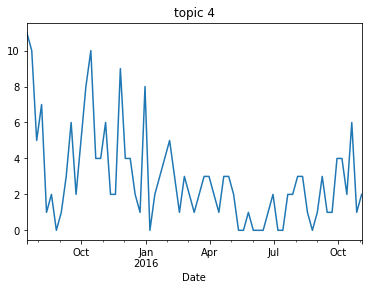

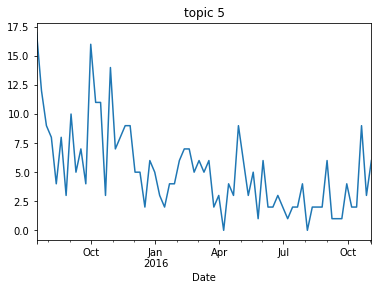

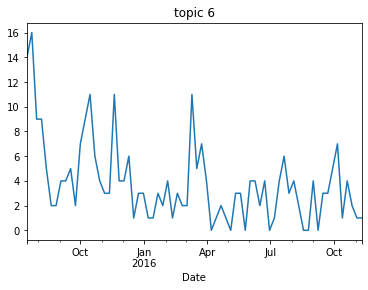

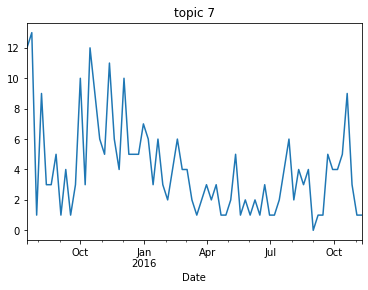

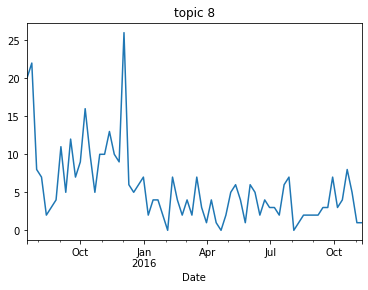

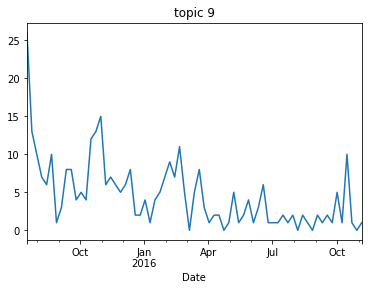

In [14]:
data['Date']=pd.to_datetime(data.Date,yearfirst=True)
data.index = data.Date
for i in range(10):
    temp = data[data.topic==i]
    temp.resample('7D').size().plot()
    plt.title('topic %s' %i)
    plt.show()

Topic #0 (competition) has 3 significant anomalies in May-August, there are suddenly over 30 tweets a week on the same topic.

Topic #7 (radio and TV) has an interesting structure — in April it decreases drastically, gradually increasing until November. This makes sense because it represents two election periods, the republican primaries election and the US presidential election.